<font size = 6px, style="color:blue">**Pumping Test Evaluation Assignment**</font>

<font size = 4px> fitting to Theis and Hantush solutions</font>

*Prof. habil. Dr.-Ing. Dipl.-Math. Ekkehard Holzbecher*

**Brief instruction for non-Pythonists**: The notebook is build of cells that can be read and viewed, but also edited and run. There are different types of cells (see dropdown list at the top ribbon). It is recommended not to edit if you don't know what you are doing! Only those cells indicated as code have to be run (use button at top ribbon). It is convenient to run all cells at start (button: *restart the kernel and re-run the whole notebook*) and to *toggle everything* (button). To re-run a single cell use the *Run* button or press *Shift-Return* keys together.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pump-Test" data-toc-modified-id="Pump-Test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pump Test</a></span></li><li><span><a href="#Data-Read-and-View" data-toc-modified-id="Data-Read-and-View-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Read and View</a></span></li><li><span><a href="#Evaluation-according-to-Cooper-Jacob" data-toc-modified-id="Evaluation-according-to-Cooper-Jacob-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evaluation according to Cooper-Jacob</a></span></li><li><span><a href="#Parameter-Estimation" data-toc-modified-id="Parameter-Estimation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Parameter Estimation</a></span><ul class="toc-item"><li><span><a href="#Evaluation-according-to-Theis" data-toc-modified-id="Evaluation-according-to-Theis-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Evaluation according to Theis</a></span></li><li><span><a href="#Evaluation-according-to-Hantush" data-toc-modified-id="Evaluation-according-to-Hantush-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Evaluation according to Hantush</a></span></li></ul></li></ul></div>

# Pump Test 

To start, enter pump test identification! 

In [1]:
import os
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pint import UnitRegistry
ureg = UnitRegistry()
t1 = pd.Series([1.0]); s1 = pd.Series([1.0])   
tdata = np.arange(1); sdata = np.arange(1)
wheader = widgets.Text(value='ID', description='Pump test', disabled=False)
wheader

Text(value='ID', description='Pump test')

The pump test can be evaluated according to the solutions of Theis and Hantush for flow towards a single well with fully penetrating screen in a uniform aquifer of infinite extent having as yet unknown transmissivity $T$ and storativity $S$. In a confined aquifer according to Theis (1952) the solution for drawdown $s$ as function of distance from the pumping well $r$ and time $t$ is given by:

$$ s(r, t) = \frac Q {4 \pi T} W(u),\,\,\,\, u = \frac {r^2 S} {4 T t}$$

$Q$ the pumping rate and $W$ is the well function, also known as exponential integral. The physical unit of transmissivity is area/time. The storativity is dimensionless.   

For a leaky aquifer the drawdown is given by the Hantush well function $W$, which has two arguments:

$$ s(r, t) = \frac Q {4 \pi T} W(u,r/\lambda)$$

with $\lambda=\sqrt{T\cdot c}$ where $c$ denotes the resistance of the over-lying semipermeable layer, which is the third yet unknown parameter. The physcial unit of resistance is time. The equation was derived assuming an overall source (Hantush & Jacob 1955, Hantush 1956). 

The physical units for time and space can be chosen by the modeller. SI units are used as default, i.e. [m] for spatial dimension, and [s] for time. Physical units for parameters in in- and output are derived from these settings. The data in the file can have different time and space dimensions. The read data values have to be converted into the units chosen here.    

In [2]:
Lunits = widgets.Dropdown(
    options=['mm','cm','dm','m'], value='m', description = "length unit"
)
Tunits = widgets.Dropdown(
    options=['s','min','hour','d'], value='s', description = "time unit"
)

def dropdown_eventhandler(change):
    pass

Lunits.observe(dropdown_eventhandler, names='value')
Tunits.observe(dropdown_eventhandler, names='value')
display(Lunits)
display(Tunits)

Dropdown(description='length unit', index=3, options=('mm', 'cm', 'dm', 'm'), value='m')

Dropdown(description='time unit', options=('s', 'min', 'hour', 'd'), value='s')

Enter distance between pumping well and observation point! Use the dot for decimals.

In [3]:
# The value for the Fetter test is 251 m. The exact value for the Walton test is 29.26 m
wr = widgets.BoundedFloatText(value=29.0, min=0, max=1000.0, description='Distance:', disabled=False)
wr

BoundedFloatText(value=29.0, description='Distance:', max=1000.0)

Enter the pumping rate using length and time units as specified above.

In [4]:
wQ = widgets.BoundedFloatText(value=0.00889, min=0, max=10000.0, description='Pumprate:', disabled=False)
#wQ = widgets.BoundedFloatText(value=0.001577, min=0, max=10000.0, description='Pumprate:', disabled=False)
wQ

BoundedFloatText(value=0.001577, description='Pumprate:', max=10000.0)

# Data Read and View

Pumptest data, time instants and observed drawdowns, are read usually from file or from clipboard. Here they are specified within the program.  

The physical units of read data can be different from the ones used in the evaluation. Here length data are in SI units, time data in seconds!

In [5]:
dataLunits = widgets.Dropdown(
    options=['mm','cm','dm','m'], value='m', description = "data length unit", disabled=False
)
dataTunits = widgets.Dropdown(
    options=['s','min','hour','d'], value='s', description = "data time unit", disabled=False
)

def dropdown_eventhandler(change):
    pass

dataLunits.observe(dropdown_eventhandler, names='value')
dataTunits.observe(dropdown_eventhandler, names='value')
display(dataLunits)
display(dataTunits)

Dropdown(description='data length unit', index=3, options=('mm', 'cm', 'dm', 'm'), value='m')

Dropdown(description='data time unit', options=('s', 'min', 'hour', 'd'), value='s')

In [6]:
tdata = np.arange(1); sdata = np.arange(1)

def on_weval0_clicked(self):
    global sdata,tdata
    # Fetter, 3rd ed., page 223
    t1 = np.array ([180,300,480,720,1200,1440,1800,2280,2820,3000,3600,4200,4800,5400,
            6000,7800,9600,12000,15600,19200,22800,30000])                # time in seconds
    #t1 = t1/60;
    s1 = np.array ([0.09144,0.21336,0.39624,0.64008,0.97536,1.09728,1.24968,1.43256,1.55448,
               1.61544,1.73736,1.85928,1.92024,2.04216,2.1336,2.286,2.52984,2.5908,2.80416,
               2.95656,3.10896,3.32232])                                  # drawdown in m
    # Fetter, 3rd ed., page 231 (Walton 1960)
    #t1 = np.array ([5,28,41,60,75,244,493,669,958,1129,1185])             # time in minutes
    #s1 = np.array ([0.76,3.3,3.59,4.08,4.39,5.47, 5.96,6.11,6.27,6.4,6.42]) # drawdown in ft
    #s1 = s1/3.281;   # error: * 
    
    tdatau = t1 * ureg(dataTunits.value); sdatau = s1 * ureg(dataLunits.value)
    tdata = tdatau.to(Tunits.value).magnitude; sdata = sdatau.to(Lunits.value).magnitude
    print ('Data ready')
   
weval0 = widgets.Button(description='Convert data')        
weval0.on_click(on_weval0_clicked)   
widgets.VBox([weval0]) 

Data ready


Plot data in real scale, time log scale, double log scale and double log! Click the cotresponding buttons!

<IPython.core.display.Javascript object>


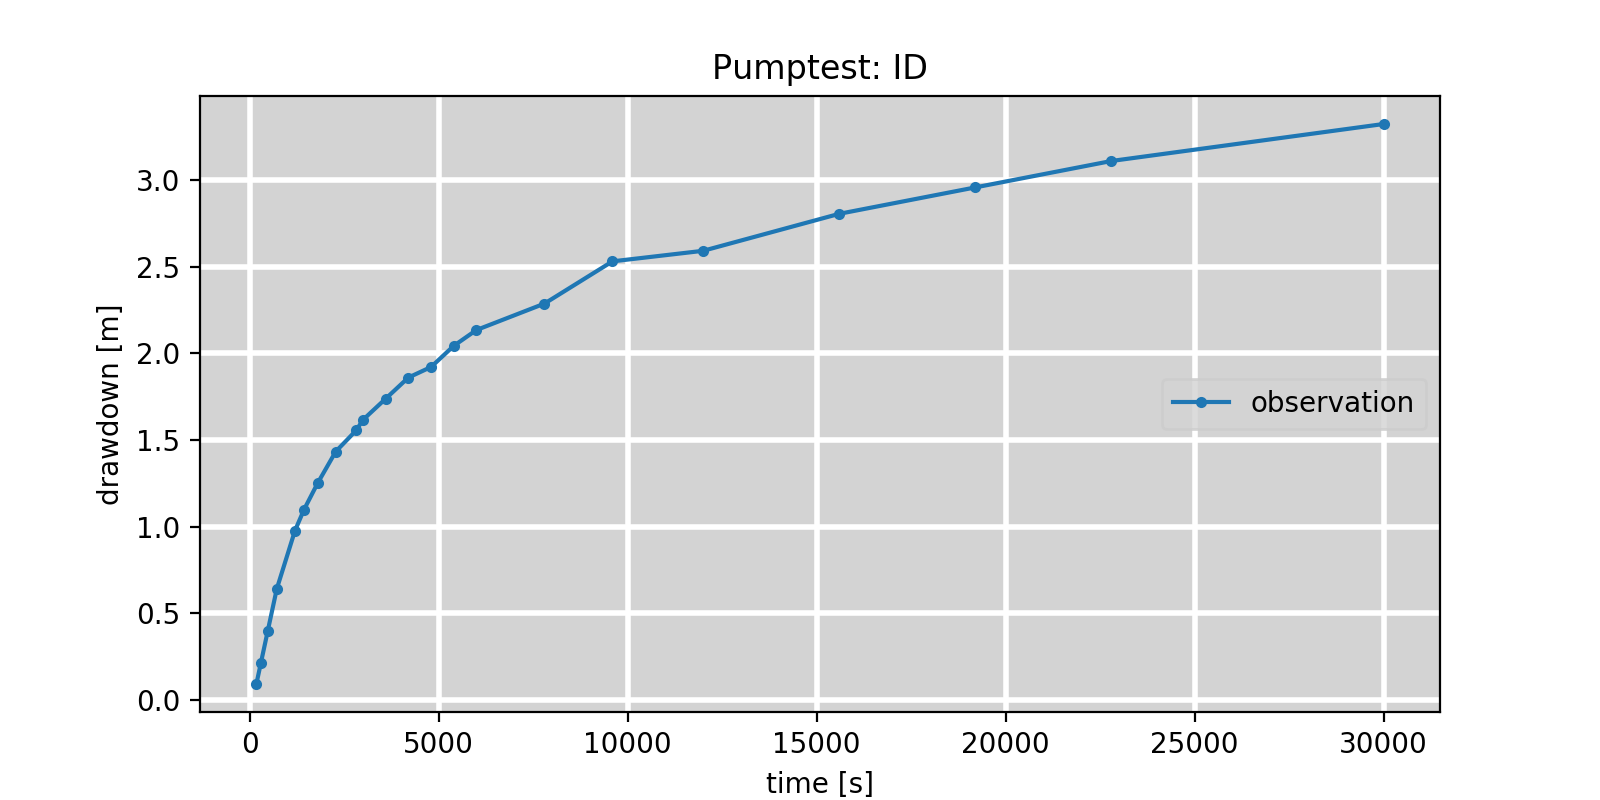

In [7]:
%matplotlib notebook
%matplotlib notebook
plt.rcParams["figure.figsize"] = (8,4) 
plt.rcParams['axes.facecolor'] = 'lightgray';

def on_wp1_clicked(self): 
    fig = plt.figure(facecolor='w'); ax = plt.gca() 
    plt.plot (tdata,sdata, '.-', label = 'observation' )
    plt.title('Pumptest: '+wheader.value)
    plt.xlabel('time ['+Tunits.value+']')
    plt.ylabel('drawdown ['+Lunits.value+']')
    ax.grid(b=True, c='w', lw=2, ls='-')
    plt.legend(loc='center right');
    
wp1 = widgets.Button(description='Plot data')        
wp1.on_click(on_wp1_clicked)   
widgets.VBox([wp1])    

In [8]:
%matplotlib notebook
%matplotlib notebook
plt.rcParams["figure.figsize"] = (8,4) 
plt.rcParams['axes.facecolor'] = 'lightgray';

def on_wp2_clicked(self):
    fig = plt.figure(facecolor='w'); ax = fig.add_subplot()
    ax.set_xscale('log')
    plt.plot (tdata,sdata, '.-', label = 'observation' )
    plt.title('Pumptest: '+wheader.value)
    plt.xlabel('time ['+dataTunits.value+']')
    plt.ylabel('drawdown ['+dataLunits.value+']')
    ax.grid(b=True, c='w', lw=2, ls='-')
    plt.legend(loc = 'upper left');

wp2 = widgets.Button(description='Plot log scale')        
wp2.on_click(on_wp2_clicked)   
widgets.VBox([wp2]) 

In [9]:
%matplotlib notebook
%matplotlib notebook
plt.rcParams["figure.figsize"] = (8,4) 
plt.rcParams['axes.facecolor'] = 'lightgray';

def on_wp3_clicked(self): 
    fig = plt.figure(facecolor='w'); ax = fig.add_subplot()
    ax.set_xscale('log'); ax.set_yscale('log')
    plt.plot (tdata,sdata, '.-', label = 'observation' )
    plt.title('Pumptest: '+wheader.value)
    plt.xlabel('time ['+dataTunits.value+']')
    plt.ylabel('drawdown ['+dataLunits.value+']')
    ax.grid(b=True, c='w', lw=2, ls='-')
    plt.legend(loc = 'lower right');

wp3 = widgets.Button(description='Plot loglog scale')        
wp3.on_click(on_wp3_clicked)   
widgets.VBox([wp3]) 

In [10]:
%matplotlib notebook
%matplotlib notebook
plt.rcParams["figure.figsize"] = (8,4) 
plt.rcParams['axes.facecolor'] = 'lightgray';

def on_wp4_clicked(self):
    r = wr.value;
    fig = plt.figure(facecolor='w'); ax = fig.add_subplot()
    ax.set_xscale('log')
    plt.plot (tdata/r/r,sdata, '.-', label = 'observation' )
    plt.title('Pumptest: '+wheader.value)
    plt.xlabel('t/r$^2$ ['+Tunits.value+'/'+Lunits.value+'$^2$]',fontsize=12)
    plt.ylabel('drawdown ['+dataLunits.value+']')
    ax.grid(b=True, c='w', lw=2, ls='-')
    plt.legend(loc = 'upper left');

wp4 = widgets.Button(description='Plot t/r/r scale')        
wp4.on_click(on_wp4_clicked)   
widgets.VBox([wp4]) 

# Evaluation according to Cooper-Jacob

**Task**: Perform the Cooper-Jacob method of evaluation. Enter the values obtained from the last plot and run the  cell below for the evaluation.

In [11]:
wds = widgets.BoundedFloatText(value=0.3, min=0.0, max=10.0, description='$\Delta S$:', disabled=False)
w0 = widgets.BoundedFloatText(value=2e-4, min=0.0, max=1., description='$(t/r^2)_0$:', disabled=False)
widgets.HBox([wds,w0]) 

In [12]:
btn = widgets.Button(description='Compute T,S')
display(btn)

def btn_eventhandler(obj):
    T = 2.3 * wQ.value / (4 * np.pi * wds.value)
    Tu = T * ureg(Lunits.value+'**2/'+Tunits.value); print('T = ', end =" ");print(Tu)
    S = 2.25 * T * w0.value
    print('S = {:.2e}'.format(S))
    
btn.on_click(btn_eventhandler)    

Button(description='Compute T,S', style=ButtonStyle())

# Parameter Estimation

Enter initial guesses for $T$ and $S$! The physical unit of transmissivity is derived from the length and time settings above. 

In [13]:
wT = widgets.FloatText(value=5e-3, description='T:', min=1.e-10, disabled=False)
wS = widgets.FloatText(value=1e-4, description='S:', min=1.e-10, disabled=False)
widgets.HBox([wT, wS])

## Evaluation according to Theis

For evaluating the pump test according to the formula of Theis click the button! The well function is computed using the exponential integral from the Python module *scipy.special*. 

In [14]:
from scipy.special import exp1
from scipy.optimize import fmin
%matplotlib notebook
%matplotlib notebook
plt.rcParams["figure.figsize"] = (8,4) 
plt.rcParams['axes.facecolor'] = 'lightgray';

def toptim (x):       
    T = x[0]; S = x[1]; D = T/S         # calculate Theis solution
    u = (((wr.value*wr.value)/4)/D)/tdata
    s = wQ.value*exp1(u)/4/np.pi/T
    res = (s-sdata)
    return sum(res*res)                 # function f to be minimized

def on_weval1_clicked(self):            # convert input data
    global tdata,sdata
    #[tdata,sdata] = uconvert(t1,s1)
    #tdata = tdatau.to(Tunits.value).magnitude; sdata = sdatau.to(Lunits.value).magnitude
    r = wr.value; ru = r * ureg(Lunits.value); print('Distance between wells: ', end =" "); print(ru)
    Q = wQ.value; Qu = Q * ureg(Lunits.value+'**3/'+Tunits.value); print('Pumping rate: ', end =" "); print(Qu)
    T = wT.value; Tu = T * ureg(Lunits.value+'**2/'+Tunits.value); print('Transmissivity, initial guess: ', end =" ");print(Tu)
    S = wS.value; Su = S * ureg(''); print('Storativity, initial guess: ', end =" "); print(Su)

    # parameter estimation---------------------------------------------------------
    [Tfit,Sfit] = fmin (toptim, [T,S])
    T = Tfit * ureg(Lunits.value+'**2/'+Tunits.value) 
    S = Sfit * ureg('') 

    # post-processing--------------------------------------------------------------   
    D = Tfit/Sfit #print ('Diffusivity = '+ str(D * ureg(Lunits.value+'**2/'+Tunits.value)))
    u = (((r*r)/4)/D)/tdata
    s = Q*exp1(u)/4/np.pi/Tfit
    dev = sdata-s     
    dev2 = dev*dev; res = np.sqrt(sum(dev2)) 
    stde = np.sqrt(dev2.mean())
    sr = 2*dev.std()                            # to compare with hytool !
    fig = plt.figure(facecolor='w'); ax = fig.add_subplot()
    ax.set_xscale('log')
    plt.plot(tdata,sdata,'o',label = 'measured') 
    t = np.logspace(np.log10(tdata.min()),np.log10(tdata.max()),100)
    u = (((r*r)/4)/D)/t
    plt.plot(t,Q*exp1(u)/4/np.pi/Tfit,'-', label = 'modelled', lw = 2)
    plt.xlabel('t ['+Tunits.value+']'); plt.ylabel('s ['+Lunits.value+']')
    plt.title('Pumptest: '+wheader.value+'        Evaluation: Theis')
    ax.grid(b=True, c='w', lw=2, ls='-')
    plt.legend ()
    ax.annotate ('$T =%.3e %s ^2/ %s $' % (Tfit,Lunits.value,Tunits.value), xy=(.6,.4), xycoords='figure fraction')
    ax.annotate ('$S =%.3e $' % (Sfit, ), xy=(.6,.35), xycoords='figure fraction')
    ax.annotate ('$2-norm = %.3e $' % (res, ), xy=(.6,.3), xycoords='figure fraction')
    ax.annotate ('$stdev =%.3e $' % (stde, ), xy=(.6,.25), xycoords='figure fraction')
    ax.annotate ('$2stdev =%.3e $' % (sr, ), xy=(.6,.2), xycoords='figure fraction');
    
weval1 = widgets.Button(description='Evaluate Theis')        
weval1.on_click(on_weval1_clicked)   
widgets.VBox([weval1])    

## Evaluation according to Hantush
For the evaluation according to Hantush enter an initial guess for the semi-permeable layer resistence. Use the time unit specified above.

In [15]:
wc = widgets.FloatText(value=1e8, description='c:', min=1.e-10, disabled=False)
widgets.HBox([wc])

The Hantush well function is computed following Maas & Veling (2010) and Veling & Maas (2010), using the exponential integral from the Python module *scipy.special*. For evaluating the pump test according to the formula of Hantush click the button!

In [16]:
from scipy.special import exp1
from scipy.special import kn as BesselK
from scipy.optimize import fmin  #fmin_l_bfgs_b
%matplotlib notebook
%matplotlib notebook
plt.rcParams["figure.figsize"] = (8,4) 
plt.rcParams['axes.facecolor'] = 'lightgray';

def heval (t,r,T,S,c,Q):
    T0  = np.where(T>1.e-10,T,1.e-10) 
    S0  = np.where(S>1.e-10,S,1.e-10)
    c0  = np.where(c>1.e-10,c,1.e-10)
    lamda = np.sqrt(T0*c0)
    rho = r/lamda
    tau = np.log(2*lamda/r*t/(c0*S0))
    s = Q/(4*np.pi*T0)*func_F(rho,tau)
    return s                            # drawdown 

def func_F(rho,tau):
    # func_F is a fast approximation of Hantush well function W
    e = exp1(rho)
    e0 = np.where(e>0,e,1.e-10)
    w = (e0-BesselK(0,rho))/(e0-exp1(rho/2))
    #if tau <= 0:
    F0 = w*exp1(rho/2*np.exp(-tau))-(w-1)*exp1(rho*np.cosh(tau))
    #else:   
    F1 = 2*BesselK(0,rho) - w*exp1(rho/2*np.exp(tau)) + (w-1)*exp1(rho*np.cosh(tau))   
    return (tau<=0)*F0+(tau>0)*F1     

def optim (x):  
    T = x[0]; S = x[1]; c = x[2] 
    s = heval (tdata,wr.value,T,S,c,wQ.value)
    res = (s-sdata)
    return sum(res*res)

def on_weval2_clicked(self):   
    global tdata,sdata
    #[tdata,sdata] = uconvert(t1,s1)
    r = wr.value; ru = r * ureg(Lunits.value); print('Distance between wells: ', end =" "); print(ru)
    Q = wQ.value; Qu = Q * ureg(Lunits.value+'**3/'+Tunits.value); print('Pumping rate: ', end =" "); print(Qu)
    T = wT.value; Tu = T * ureg(Lunits.value+'**2/'+Tunits.value); print('Transmissivity, initial guess: ', end =" ");print(Tu)
    S = wS.value; Su = S * ureg(''); print('Storativity, initial guess: ', end =" "); print(Su)
    c = wc.value; cu = c * ureg(Tunits.value); print('Resistence, initial guess: ', end =" "); print(cu)

    # parameter estimation 
    #x = fmin_l_bfgs_b(optim, [T,S,c], approx_grad=1, bounds=((1.e-10, 1.e10), (1.e-10, 1.e10), (1.e-10, 1.e10)))   
    #Tfit = x[0][0]; Sfit = x[0][1]; cfit = x[0][2]
    [Tfit,Sfit,cfit] = fmin (optim, [T,S,c])
    T = Tfit * ureg(Lunits.value+'**2/'+Tunits.value) 
    S = Sfit * ureg('') 
    c = cfit * ureg(Tunits.value)

    # post-processing--------------------------------------------------------------   
    D = T/S #print ('D='+str(D))
    s = heval (tdata,r,Tfit,Sfit,cfit,Q)
    dev = sdata-s                             #sfit-s 
    dev2 = dev*dev; res = np.sqrt(sum(dev2)) 
    stde = np.sqrt(dev2.mean())
    sr = 2*dev.std()                            # to compare with hytool !
    fig = plt.figure(facecolor='w'); ax = fig.add_subplot()
    ax.set_xscale('log')
    plt.plot(tdata,sdata,'o',label = 'measured') 
    t = np.logspace(np.log10(tdata.min()),np.log10(tdata.max()),100)
    plt.plot(t,heval(t,r,Tfit,Sfit,cfit,Q),'-', label = 'modelled', lw = 2)
    plt.xlabel('t ['+Tunits.value+']'); plt.ylabel('s ['+Lunits.value+']')
    plt.title('Pumptest: '+wheader.value+'        Evaluation: Hantush')
    ax.grid(b=True, c='w', lw=2, ls='-')
    plt.legend ()
    ax.annotate ('$T =%.3e %s ^2/ %s $' % (Tfit,Lunits.value,Tunits.value), xy=(.6,.4), xycoords='figure fraction')
    ax.annotate ('$S =%.3e $' % (Sfit, ), xy=(.6,.35), xycoords='figure fraction')
    ax.annotate ('$c =%.3e %s $' % (cfit,Tunits.value), xy=(.6,.3), xycoords='figure fraction')
    ax.annotate ('$2-norm = %.3e $' % (res, ), xy=(.6,.25), xycoords='figure fraction')
    ax.annotate ('$stdev =%.3e $' % (stde, ), xy=(.6,.2), xycoords='figure fraction')
    ax.annotate ('$2stdev =%.3e $' % (sr, ), xy=(.6,.15), xycoords='figure fraction');
    
weval2 = widgets.Button(description='Evaluate Hantush')        
weval2.on_click(on_weval2_clicked)   
widgets.VBox([weval2])